In [1]:
import matplotlib.pyplot as plt
import os

from dask.distributed import Client

from ase.build import bulk
from abtem import show_atoms, FrozenPhonons, Probe, Potential, GridScan, AnnularDetector

os.environ["MKL_NUM_THREADS"] = "1"

Runtime: 40 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

In [2]:
atoms = bulk('Si', 'diamond', a=5.43, cubic=True)
atoms *= (4, 4, 1)

In [3]:
chunks = 100 # max number of wave functions in each chunk

frozen_phonons = FrozenPhonons(atoms, 1, {'Si': .0})

potential = Potential(frozen_phonons, 
                      gpts=512, 
                      device='cpu', 
                      projection='infinite', 
                      slice_thickness=1)

probe = Probe(energy=100e3, semiangle_cutoff=20, device='cpu')
scan = GridScan()
detectors = AnnularDetector(50, 150)
measurement = probe.scan(scan, detectors, potential, chunks=chunks)

In [4]:
probe.build(scan, chunks).array # For showing the size of the chunks

dask.array<calculate_probes, shape=(53, 53, 512, 512), dtype=complex64, chunksize=(10, 10, 512, 512), chunktype=numpy.ndarray>

In [5]:
%%time
measurement.compute()

[########################################] | 100% Completed | 42.6s
Wall time: 42.6 s


(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x275bf8eeac0>)

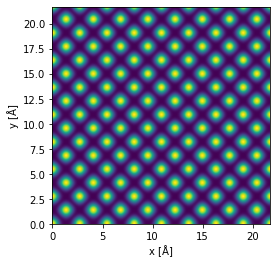

In [28]:
measurement.interpolate(.1).show()